# EDA: Ganglion Cells in the Retina
- **Author:** David Felipe
- **Contact:** https://github.com/davidnfu0
- **Last Modification:** January 25, 2024
- **Description:** This document contains a small exploratory data analysis.

## Introduction

### Importing Libraries

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
sys.path.append("../")

In [3]:
from scripts import load_yaml_config, plot_scatter, plot_hist, plot_hist2d

### Paths and Configurations

In [4]:
plt.style.use("seaborn-v0_8-darkgrid")

In [5]:
configPath = "../config/"
config = load_yaml_config(configPath + "general_config.yml")
RFS_PATH = config["paths"]["data_cache"]["RFS"]
SPIKETIMES_PATH = config["paths"]["data_cache"]["SPT"]
TOTAL_SPIKES_PATH = config["paths"]["data_cache"]["TOTAL_SPIKES"]

### Loading Data

In [6]:
with open("../" + RFS_PATH, 'rb') as file:
    RFS = pickle.load(file)

with open("../" + SPIKETIMES_PATH, 'rb') as file:
    SPIKETIMES = pickle.load(file)

with open("../" + TOTAL_SPIKES_PATH, 'rb') as file:
    TOTAL_SPIKES = pickle.load(file)

### Constants

In [7]:
NUM_TEMP = len(RFS)
VAR_RFS = {'x': np.zeros(NUM_TEMP),
           'y': np.zeros(NUM_TEMP),
           'w': np.zeros(NUM_TEMP),
           'h': np.zeros(NUM_TEMP),
           'a': np.zeros(NUM_TEMP),
           'exc': np.zeros(NUM_TEMP)}

for var in VAR_RFS.keys():
    for i, key in enumerate(RFS.keys()):
        VAR_RFS[var][i] = RFS[key][var]
    
print(VAR_RFS['x'][8])

118.72570343026875


## Exploratory Data Analysis

### Mean & Std

In [8]:
STD_RFS = {}
MEAN_RFS = {}

for var, values in VAR_RFS.items():
    STD_RFS[var] = np.std(values)
    MEAN_RFS[var] = np.mean(values)
    
for var in VAR_RFS.keys():
    print(f'{var}: std = {STD_RFS[var]}, mean = {MEAN_RFS[var]}')

x: std = 14.310161537512657, mean = 23.368478333494362
y: std = 18.366961943207322, mean = 15.939620044295909
w: std = 26.171895731143895, mean = 9.731825656611855
h: std = 19.167117439574305, mean = 6.647336323695114
a: std = 39.53581753394941, mean = 47.475852908218975
exc: std = 0.13996943227274827, mean = 0.6924413422894052


### Normalizing the RFS vars

In [9]:
NORM_VAR_RFS = {}

for var in VAR_RFS.keys():
    NORM_VAR_RFS[f'{var}_norm'] = (VAR_RFS[var] - MEAN_RFS[var]) / STD_RFS[var]

### Histograms

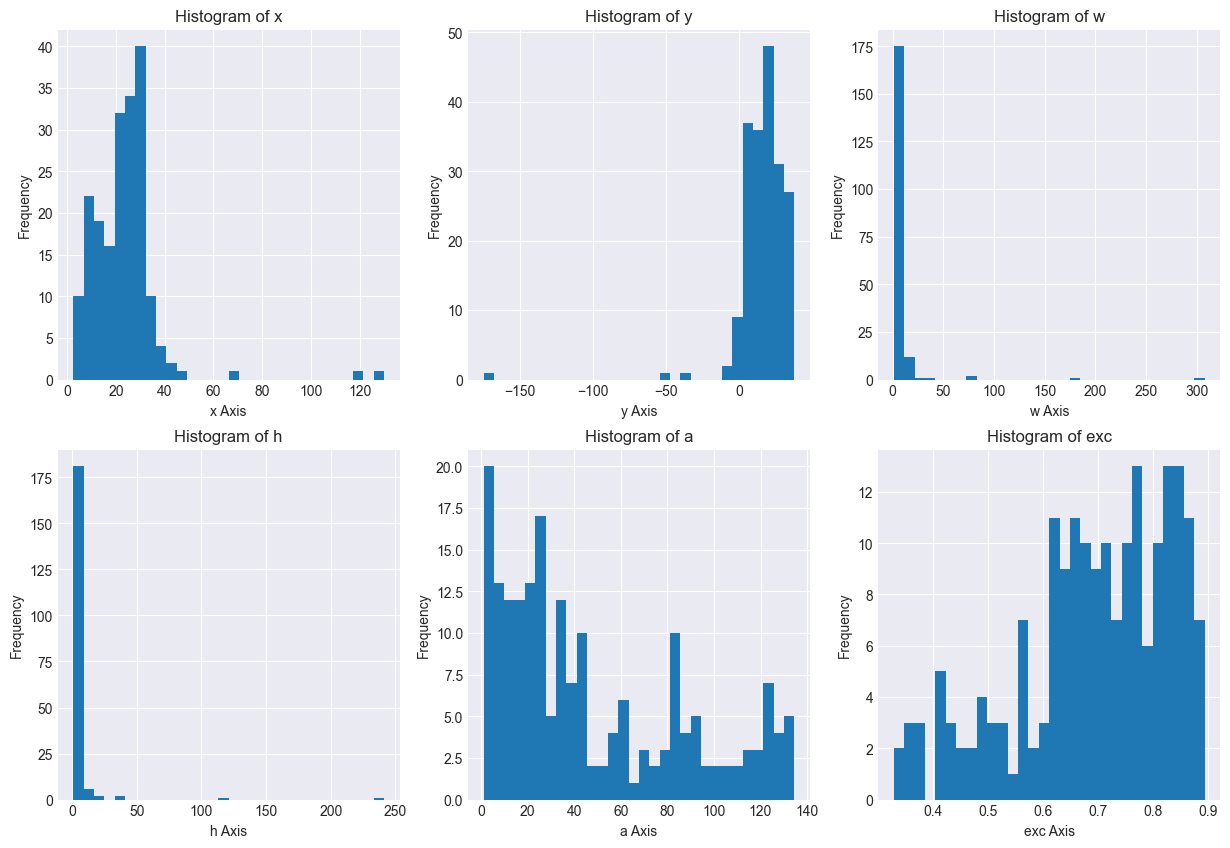

In [10]:
rows = 2
columns = 3
plotNum = 1
bins = 30
figureSize = (15, 10)
plt.figure(figsize=figureSize)
for var in VAR_RFS.keys():
    plot_hist(title=f"Histogram of {var}", 
              X=VAR_RFS[var],
              xlab=f"{var} Axis",
              ylab="Frequency",
              row=rows, 
              column=columns, 
              plot_number=plotNum,
              bins=bins)
    plotNum += 1
plt.show()

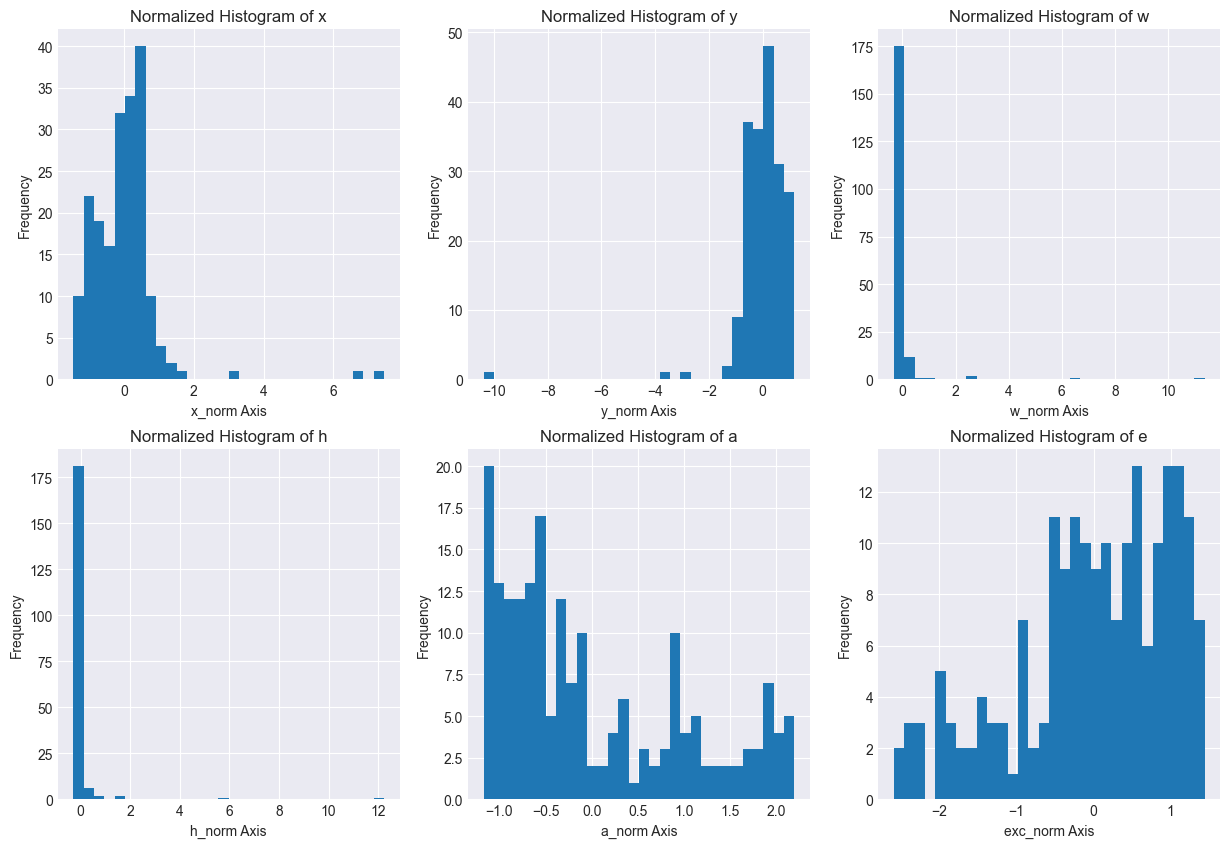

In [11]:
rows = 2
columns = 3
figureSize = (15, 10)
plotNum = 1
plt.figure(figsize=figureSize)
for var in NORM_VAR_RFS.keys():
    plot_hist(title=f"Normalized Histogram of {var[0]}", 
              X=NORM_VAR_RFS[var],
              xlab=f"{var} Axis",
              ylab="Frequency",
              row=rows, 
              column=columns, 
              plot_number=plotNum,
              bins=bins)
    plotNum += 1
plt.show()

### 2D Histograms

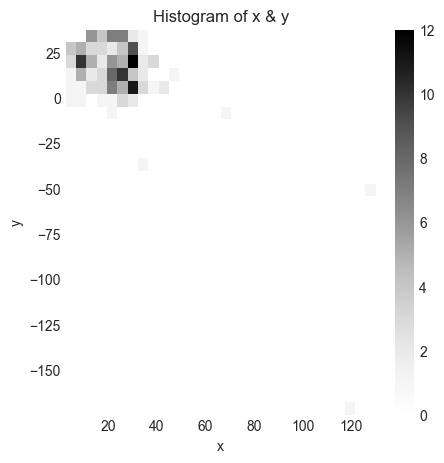

In [12]:
figureSize = (5, 5)
plt.figure(figsize=figureSize)
plot_hist2d(title="Histogram of x & y", xlab='x', ylab='y', X=VAR_RFS['x'], Y=VAR_RFS['y'], bins=30)
plt.show()

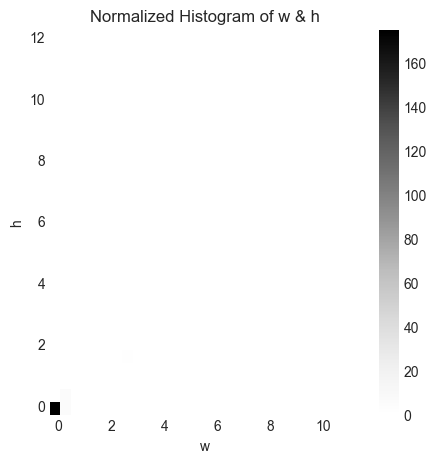

In [13]:
plt.figure(figsize=figureSize)
plot_hist2d(title="Normalized Histogram of w & h", xlab='w', ylab='h', X=NORM_VAR_RFS['w_norm'], Y=NORM_VAR_RFS['h_norm'], bins=30)
plt.show()

### Scatter Plots

c:\Users\Javier\Retinal-Ganglion-Cell-Analysis\notebooks\..\scripts\plots.py:106: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=X, y=Y, c=color, cmap=cmap)


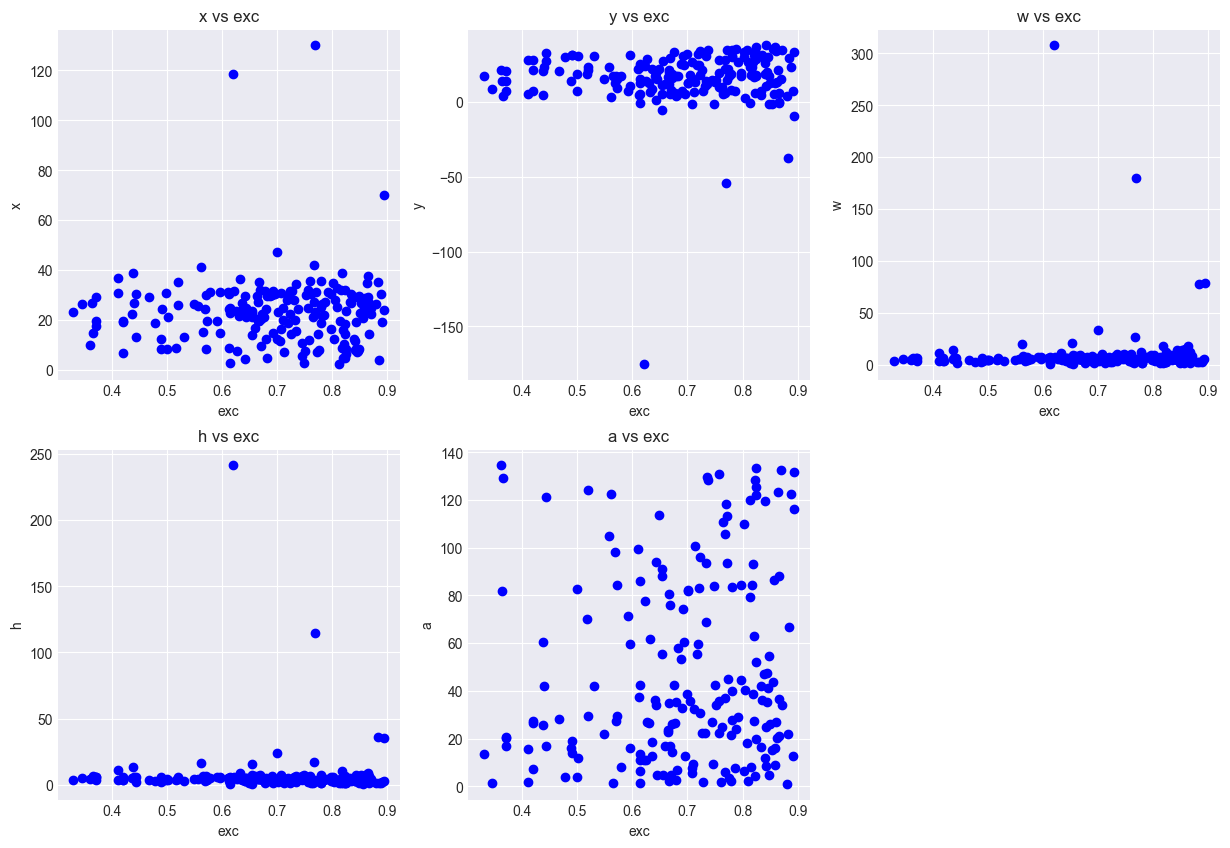

In [14]:
rows = 2
columns = 3
figureSize = (15, 10)
plotNum = 1
plt.figure(figsize=figureSize)
for var in VAR_RFS.keys():
    if var != 'exc':  
        plot_scatter(title=f"{var} vs exc",
                     X=VAR_RFS['exc'], 
                     Y=VAR_RFS[var],
                     xlab='exc',
                     ylab=var,
                     row=rows, 
                     column=columns, 
                     plot_number=plotNum)
        plotNum += 1
plt.show()

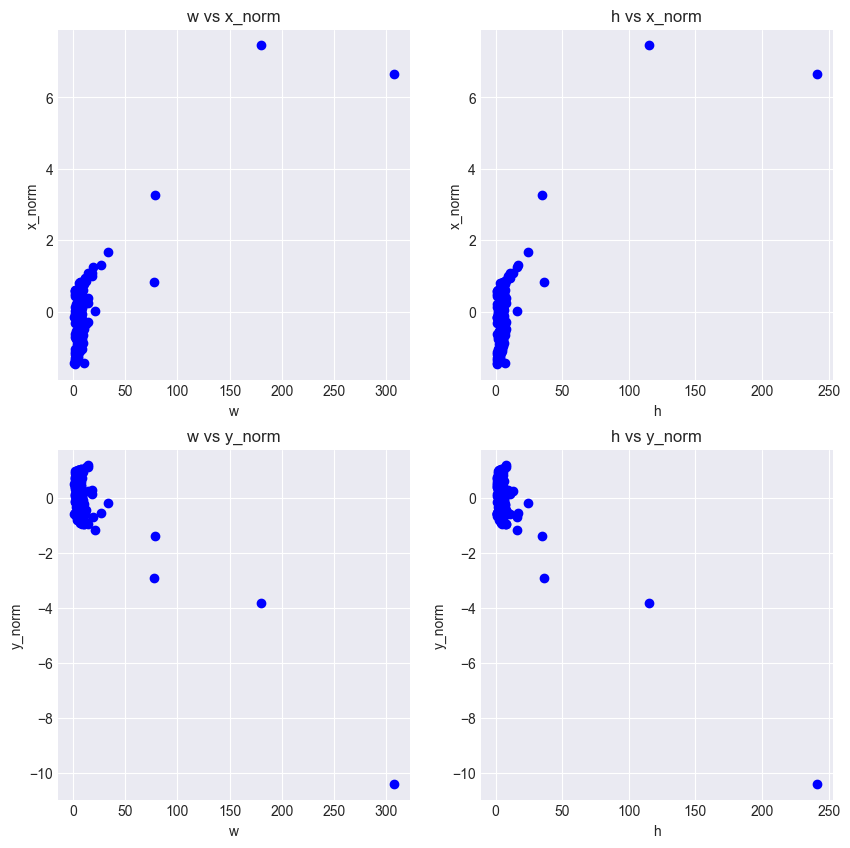

In [15]:
normalized_vars = ['x_norm', 'y_norm']
dimension_vars = ['w', 'h']
rows = 2
columns = 2
plotNum = 1
figureSize = (10, 10)
plt.figure(figsize=figureSize)

for norm_var in normalized_vars:
    for dim_var in dimension_vars:
        plot_scatter(title=f"{dim_var} vs {norm_var}",
                     X=VAR_RFS[dim_var], 
                     Y=NORM_VAR_RFS[norm_var],
                     xlab=dim_var,
                     ylab=norm_var,
                     row=rows, 
                     column=columns, 
                     plot_number=plotNum)
        plotNum += 1
plt.show()

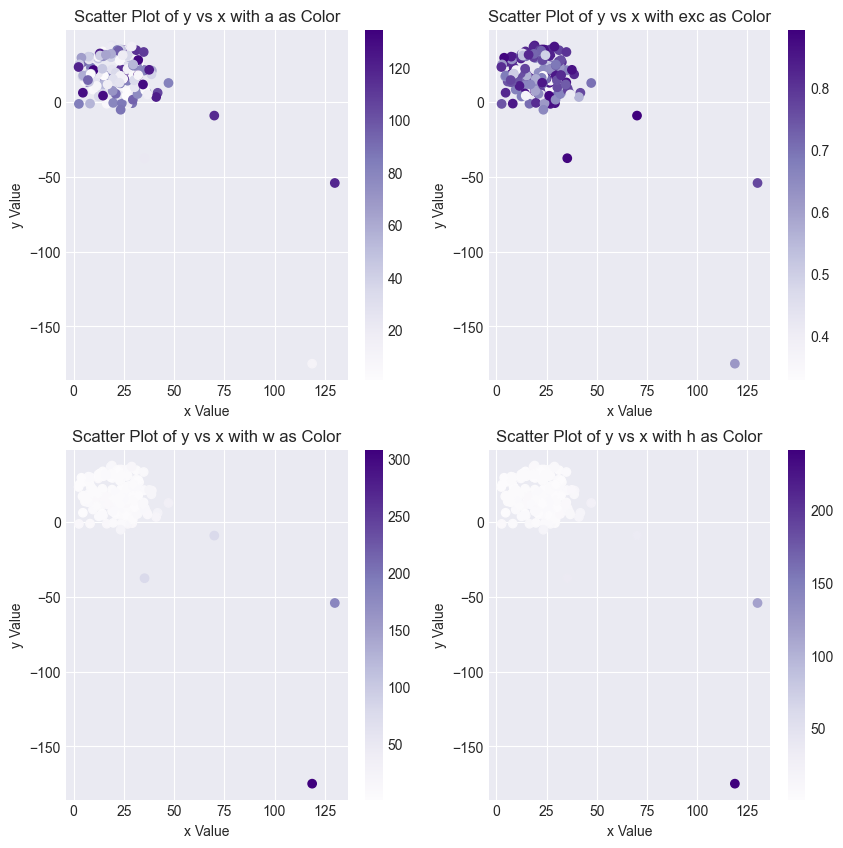

In [16]:
color_vars = ['a', 'exc', 'w', 'h']
rows = 2
columns = 2
figureSize = (10, 10)
plotNum = 1
plt.figure(figsize=figureSize)
for color_var in color_vars:
    plot_scatter(title=f"Scatter Plot of y vs x with {color_var} as Color",
                 X=VAR_RFS['x'], 
                 Y=VAR_RFS['y'], 
                 xlab='x Value',
                 ylab='y Value',
                 row=rows, 
                 column=columns,
                 plot_number=plotNum,
                 color=VAR_RFS[color_var],
                 cmap='Purples') 
    plotNum += 1
plt.show()

### Total Spikes Analysis

In [17]:
TOTAL_SPIKES_ARRAY = np.array(list(TOTAL_SPIKES.values()))

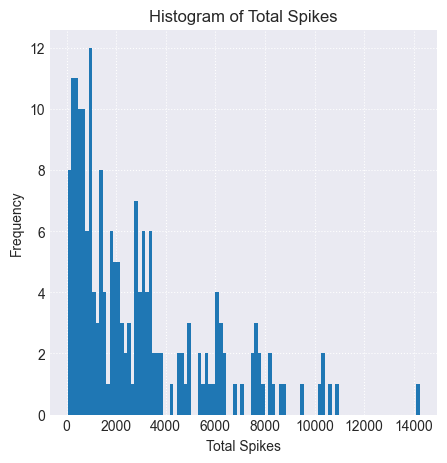

In [18]:
figureSize = (5, 5)
bins = 100
plt.figure(figsize=figureSize)
plot_hist(title="Histogram of Total Spikes", 
          X=TOTAL_SPIKES_ARRAY,
          xlab="Total Spikes",
          ylab="Frequency",
          bins=bins)
plt.grid(linestyle = ":")
plt.show()

In [19]:
MEAN_TOTAL_SPIKES = np.mean(TOTAL_SPIKES_ARRAY)
STD_TOTAL_SPIKES = np.std(TOTAL_SPIKES_ARRAY)
print(f"Mean of total spikes: {MEAN_TOTAL_SPIKES}, std of total spikes: {STD_TOTAL_SPIKES}")

Mean of total spikes: 2864.9689119170985, std of total spikes: 2754.603128005179


___